In [2]:
import numpy as np 

In [3]:
import matplotlib.pylab as plt 

In [4]:
def numerical_gradient(f, X): 
    def numerical_gradient_of_scalar_function_wrt_vector_x(f, x): 
        h = 1e-4 # 0.0001 
        grad = np.zeros_like(x) # x와 형상이 같은 배열을 생성 
        
        # The partial differential of function f with respect to x_idx 
        for idx in range(x.size): 
            tmp_val = x[idx] 

            # f(x+h)
            x[idx] = tmp_val + h 
            f_x_plus_h = f(x)
            
            # f(x) 
            x[idx] = tmp_val 
            fx = f(x) 
            
            grad[idx] = (f_x_plus_h - fx) / h 
            
            #x[idx] = tmp_val 
        
        return grad
    
    if X.ndim == 1:
        return numerical_gradient_of_scalar_function_wrt_vector_x(f, X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = numerical_gradient_of_scalar_function_wrt_vector_x(f, x)
        
        return grad 

In [5]:
def numerical_diff(f, x): 
    h = 1e-5 # 0.00001 
    #return ( f(x + h) - f(x - h) ) / (2 * h)   # Symmetric derivative 
    return (f(x + h) - f(x)) / h     

In [66]:

def gradient_descent(f, x_0, eta, max_iter): 
    x_k = x_0 
    
    for k in range(max_iter): 
        g_k = numerical_gradient(f,x_k)
        partial_x_k= -g_k
        x_k_plus_1=x_k + eta * partial_x_k
        
        

        x_k = x_k_plus_1
        
    return x_k

In [77]:
def cube(x):
  x[1]=8/(x[0]**2)
  return 2*(x[0]**2) + 4*x[0]*x[1]

In [79]:
x_0 = np.array([3.0, 4.0])

In [63]:
gradient_descent(cube, x_0=x_0, eta=0.01, max_iter=100)

array([1.99996437, 2.00006734])

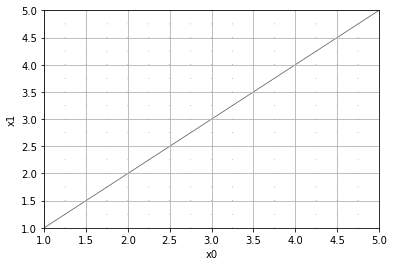

In [20]:
x0 = np.arange(-2, 5, 0.25)
x1 = np.arange(-2, 5, 0.25)
X, Y = np.meshgrid(x0, x1)

X = X.flatten()
Y = Y.flatten()



def _function_2(x):
    if x.ndim == 1:
      
      x[1]=8/(x[0]**2)
      return np.sum(2*(x[0]**2) + 4*x[0]*x[1])
    else:
      x[1]=8/(x[0]**2)
      return np.sum( 2*(x[0]**2) + 4*x[0]*x[1], axis=1)


grad = numerical_gradient(_function_2 , np.array([X,Y]))


plt.figure()
plt.quiver(X, Y, -grad[0], -grad[1],  angles="xy",color="#666666")#,headwidth=10,scale=40,color="#444444")
plt.xlim([1, 5])
plt.ylim([1, 5])
plt.xlabel('x0')
plt.ylabel('x1')
plt.grid()
plt.draw()
plt.show()

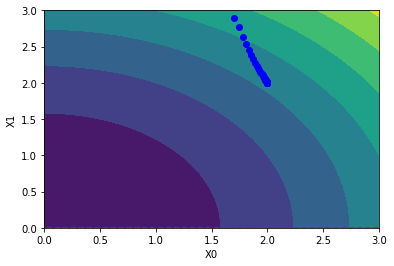

In [78]:
x_0 = np.array([1.7, 2.9])    

x, x_history = _gradient_descent(cube, x_0, eta=0.01, max_iter=100)

plt.plot( [-5, 10], [0,0], '--r')
plt.plot( [0,0], [-10, 10], '--r')
plt.plot(x_history[:,0], x_history[:,1], 'bo')

# https://www.geeksforgeeks.org/contour-plot-using-matplotlib-python/
feature_x = np.linspace(0, 3, 70) 
feature_y = np.linspace(0, 3, 70) 
  
# Creating 2-D grid of features 
[X, Y] = np.meshgrid(feature_x, feature_y) 
  
Z = X ** 2 + Y ** 2
  
# plots filled contour plot 
plt.contourf(X, Y, Z) 

plt.xlim(0, 3)
plt.ylim(0, 3)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()